In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

In [84]:
def sufficient_conditions(w_H,w_L,D=1):
    ## (1) Case 1
    #Grids
    alpha_vals = np.linspace(max(0.001, np.sqrt(D/w_L)), 0.999, 1000)
    r_vals     = np.linspace(0.001, 0.999, 1000)
    A, R = np.meshgrid(alpha_vals, r_vals, indexing='ij')
    #Expressions
    lhs = 1 + R
    rhs = (1 + A**2) / (A * (1 + A)) + (((1 + R) * (1 + A**2) - (1 + R**2) * A * (1 + A)) * w_L + 2 * (1 - A) * D) / (A * (1 + A) * (1 - R) * w_H)
    condition1 = lhs > rhs
    
    ## (2) Case 2
    #Grids
    alpha_vals = np.linspace(max(0.001, D/w_L), min(0.999,np.sqrt(D/w_L)), 1000)
    r_vals     = np.linspace(0.001, 0.999, 1000)
    A, R = np.meshgrid(alpha_vals, r_vals, indexing='ij')
    #Expressions
    lhs = 1 + R
    rhs = (1 + A**2) / (A * (1 + A)) + ((1 + R) * A * (1 + A**2) * w_L + (((1 - R**2) * (1 + A) - 2 * (1 + A**2)) * D))/ (A**2 * (1 + A) * (1 - R) * w_H)
    condition2 = lhs > rhs
    
    ## (3) Case 3
    #Grids
    alpha_vals = np.linspace(max(0.001, np.sqrt(D/w_H)), min(0.999, D/w_L), 1000)
    r_vals     = np.linspace(0.001, 0.999, 1000)
    A, R = np.meshgrid(alpha_vals, r_vals, indexing='ij')
    #Expressions
    lhs = 1 + R
    rhs = (1 + A**2) / (A * (1 + A)) + (((1 + R) * (1 + A) - (1 + A**2)) * D) / (A**2 * (1 + A) * w_H)
    condition3 = lhs > rhs

    #Aggregation
    alpha_vals = np.linspace(max(0.001, np.sqrt(D/w_H)), 0.999, 1000)
    condition=np.vstack([condition3, condition2, condition1])

    #Plot
    fig, ax = plt.subplots(figsize=(6, 5))

    navy = '#DCE8F6' #Or '#EAF3FB','#CFE8FF'
    cmap = ListedColormap(['#FFFFFF', navy]) 
    
    im = ax.imshow(
        condition.astype(int),
        extent=[r_vals.min(), r_vals.max(),
                alpha_vals.min(), alpha_vals.max()],
        origin='lower',
        aspect='auto',
        cmap=cmap,
        vmin=0, vmax=1,
        interpolation='nearest'
    )
    
    y_for_contour = np.linspace(alpha_vals.min(), alpha_vals.max(), condition.shape[0])
    ax.contour(
        r_vals,
        y_for_contour,
        condition.astype(int),
        levels=[0.5],
        colors='#6D7F91',
        linewidths=0.8
    )
    
    ax.set_xlabel('r')
    ax.set_ylabel(r'$\alpha$')
    #ax.set_title(f"$w_H={w_H}D, w_L={w_L}D$")
    ax.set_xlim(0, 1)
    
    legend_handles = [
        Patch(facecolor=navy, edgecolor='k', label='True'),
        Patch(facecolor='#FFFFFF', edgecolor='k', label='False')
    ]
    ax.legend(handles=legend_handles, loc='upper right', frameon=True)
    
    for spine in ax.spines.values():
        spine.set_linewidth(0.8)
    ax.tick_params(width=0.8, length=3.5, labelsize=9)
    ax.set_ylim(0.5, 1.0)
    ax.set_yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    ax.set_yticklabels(['0.5', '0.6', '0.7', '0.8', '0.9', '1.0'])

    plt.tight_layout()
    plt.show()

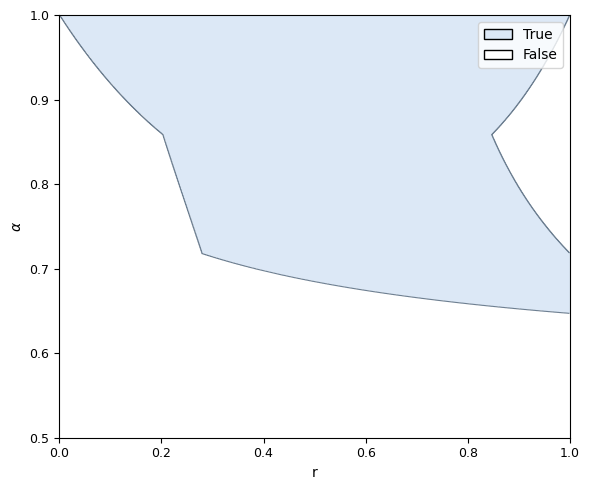

In [85]:
sufficient_conditions(3,1.2)

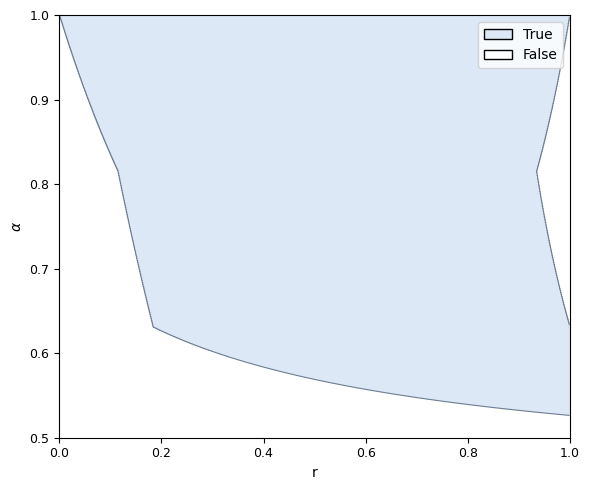

In [86]:
sufficient_conditions(5,1.2)

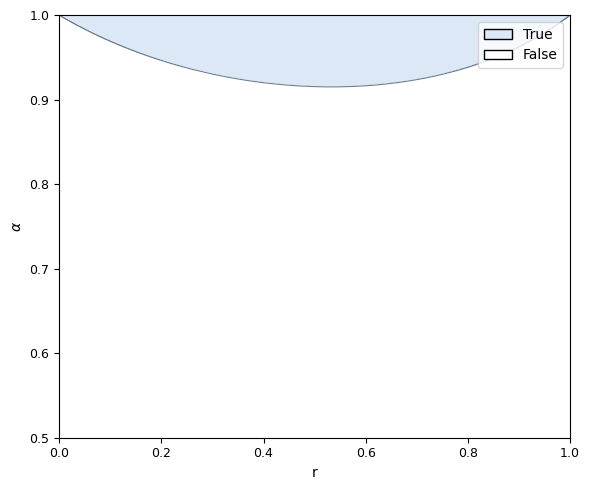

In [89]:
sufficient_conditions(3,1.5)

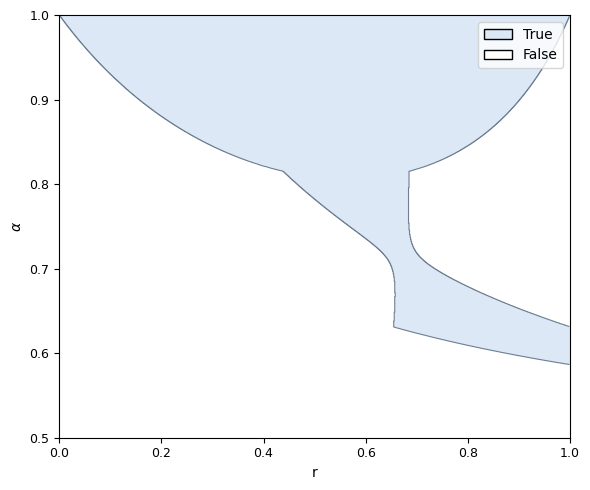

In [90]:
sufficient_conditions(5,1.5)